## Welcome to Zomata Bangalore EDA notebook
You can download the dataset used in this notebook from here : https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants

### The objective of this notebook is to:
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results

We will follow below steps to do that:

### Pick a dataset.
- Loading the dataset: Load the data and import the libraries.
- Data Cleaning:
- Deleting redundant columns.
- Renaming the columns.
- Dropping duplicates.
- Cleaning individual columns.
- Remove the NaN values from the dataset
- Some Transformations

### Data Visualization: Using plots to find relations between the features.

- Restaurants delivering Online or not
- Restaurants allowing table booking or not
- Table booking Rate vs Rate
- Best Location
- Relation between Location and Rating
- Restaurant Type
- Gaussian Rest type and Rating
- Types of Services
- Relation between Type and Rating
- Cost of Restuarant
- No. of restaurants in a Location
- Restaurant type
- Most famous restaurant chains in Bengaluru

#### The basic idea is analyzing the Buisness Problem of Zomato to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant and many more.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
pwd

'C:\\Users\\nayab\\Downloads\\Exploratory Data Analysis-20201112T080043Z-001\\Exploratory Data Analysis\\zomato_2\\zomato'

In [2]:
zomato_real=pd.read_csv("C:\\Users\\nayab\\Downloads\\Exploratory Data Analysis-20201112T080043Z-001\\Exploratory Data Analysis\\zomato_2\\zomato\\zomato.csv")
zomato_real.head() # prints the first 5 rows of a DataFrame

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# 2. Pose at least three questions related to business or real-world applications of how the data could be used.
##### business questions:
1. Which locations to look for while opening new restaurants?
2. What factors affect the rating of your restaurants?
3. Pricing and dishes to go with?
4. Is an online presence really helpful?

##### Column Description:

- url : zomato url for the restaurants
- address : complete location of the restaurant
- name : name of the restaurant
- online_order : whether restaurant accepts online order
- book_table : whether restaurant provides option for booking table
- rate : restaurants rating on zomato website
- votes : number of individual who voted for restaurants
- phone : contact details of the restaurant
- localtion : area where restaurant is situated
- rest_type : Type of restaurants (Categorical value)
- dish_liked : what are all dishes of the restaurant that people liked
- cuisines : cuisines offered by the restaurant
- approx_cost(for two people) : average cost for two people
- review_list : reviews of the restaurant on zomato website
- menu_item : menu items available in the restuarant
- listed_in(type) : type of the restaurant
- listed_in(city) : locality of the restaurant position

In [3]:
# Checking Dataset Size
zomato_real.shape

(51717, 17)

In [4]:
# Basic Information regarding dataframe
zomato_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Data Cleaning

##### Dropping columns 'url', 'address', 'phone' and 'menu_item' as they are not much relevant for analysis or empty.

In [5]:
zomato= zomato_real.drop(['url','phone'],axis=1)

In [6]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### Cheking Duplicates in DataFrame and Drop It 

In [7]:
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [8]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### Cheking Null Values available in dataframe and drop it if any: 

In [9]:
zomato.isnull().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7767
votes                              0
location                          21
rest_type                        227
dish_liked                     28047
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23395 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      23395 non-null  object
 1   name                         23395 non-null  object
 2   online_order                 23395 non-null  object
 3   book_table                   23395 non-null  object
 4   rate                         23395 non-null  object
 5   votes                        23395 non-null  int64 
 6   location                     23395 non-null  object
 7   rest_type                    23395 non-null  object
 8   dish_liked                   23395 non-null  object
 9   cuisines                     23395 non-null  object
 10  approx_cost(for two people)  23395 non-null  object
 11  reviews_list                 23395 non-null  object
 12  menu_item                    23395 non-null  object
 13  listed_in(type)              23

In [11]:
# Renanming Some Columns into more understable term:
zomato=zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})

In [12]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

#### Converting 'Cost' column type into 'str' for replacing ',' with '.' after that reassign dataype to float for 'cost' column;

In [13]:
zomato['cost']=zomato['cost'].astype(str)

In [14]:
zomato['cost']=zomato['cost'].apply(lambda x : x.replace(',','.'))

In [15]:
zomato['cost']=zomato['cost'].astype(float)

In [16]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23395 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       23395 non-null  object 
 1   name          23395 non-null  object 
 2   online_order  23395 non-null  object 
 3   book_table    23395 non-null  object 
 4   rate          23395 non-null  object 
 5   votes         23395 non-null  int64  
 6   location      23395 non-null  object 
 7   rest_type     23395 non-null  object 
 8   dish_liked    23395 non-null  object 
 9   cuisines      23395 non-null  object 
 10  cost          23395 non-null  float64
 11  reviews_list  23395 non-null  object 
 12  menu_item     23395 non-null  object 
 13  type          23395 non-null  object 
 14  city          23395 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.9+ MB


#### Converting rating value in proper format by removing some irrelevent data and denominator '/5' :

In [17]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head() # looking at the dataset after transformation

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

#### Exporting Cleaned data for dashboard creation in Power BI

In [21]:
path = "C:\\Users\\nayab\\Downloads\\"
import os
 #Changing my CWD
os.chdir(path)

zomato.to_csv('zomato_clean.csv')

## Data Visualization

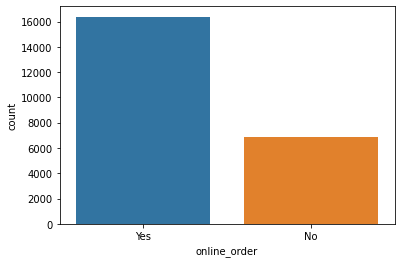

In [19]:
sns.countplot(zomato['online_order']);
#zomato['online_order'].value_counts().plot(kind='bar')

#### It can be seen that people prefer Online order.

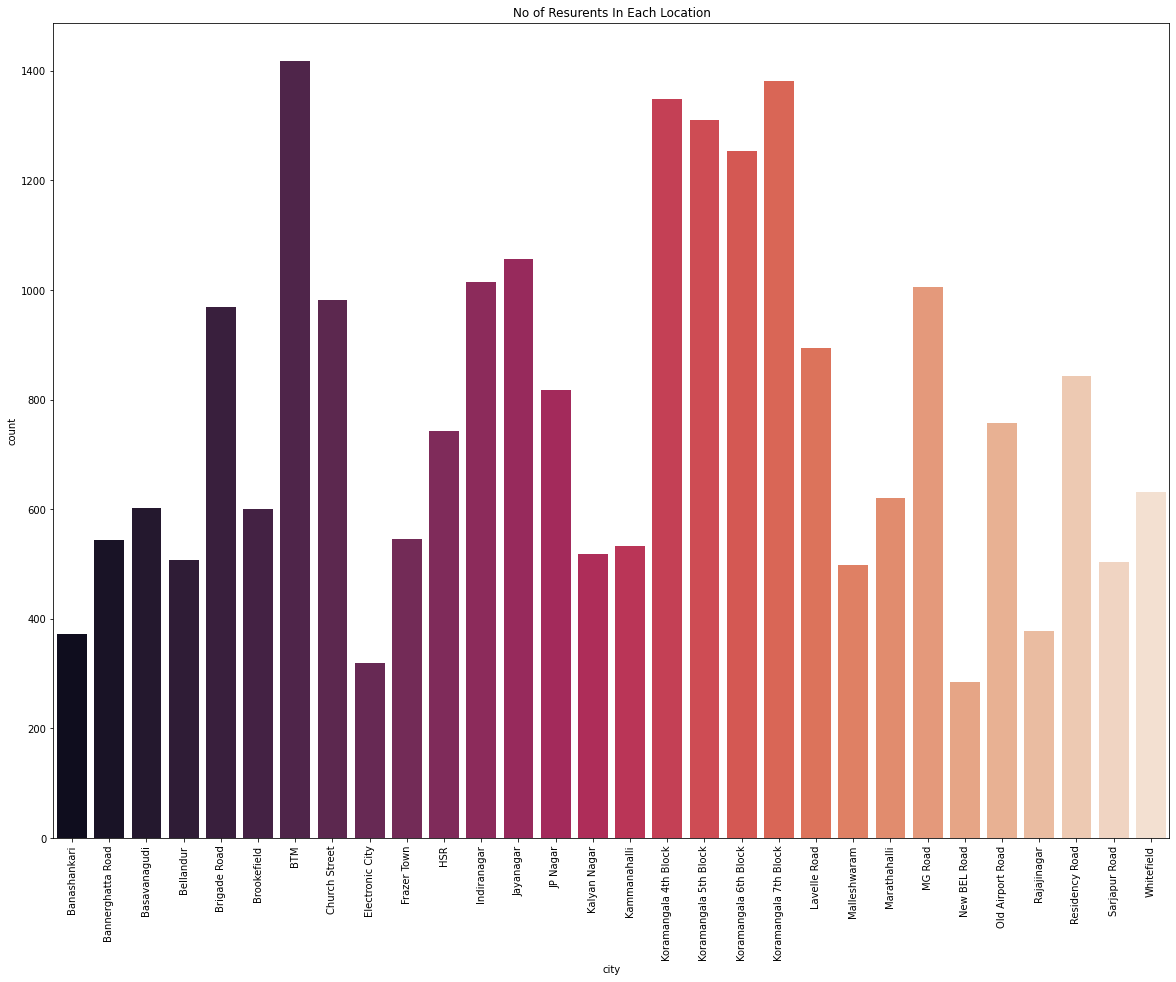

In [20]:
# No of Resturents location Wise :

plt.figure(figsize =(20,15))
sns.countplot(zomato['city'],palette ='rocket')
plt.title('No of Resurents In Each Location')
plt.xticks(rotation=90)
plt.show();

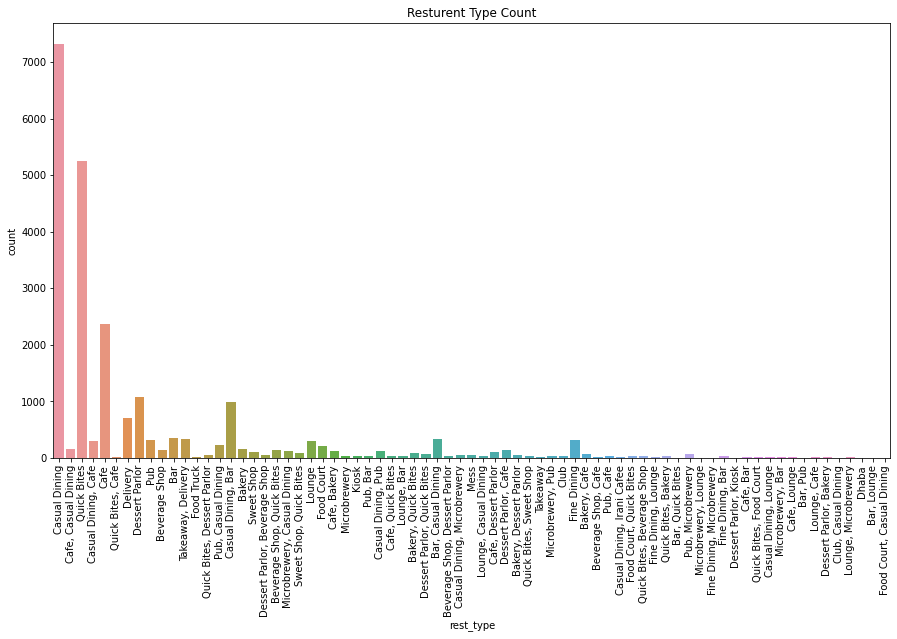

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(zomato['rest_type'])
plt.title('Resturent Type Count')
plt.xticks(rotation=90)
plt.show()

#### We can see that 'Casual Dinning','Quick Bites','Cafe',' Dessert Parlor','Delivery','Casual Dinnnig,Bar' types of resturents are more popular :

In [25]:
# Visuals for Top Resturents Type liked by Banglorian:
top_resturent_type=zomato['rest_type'].value_counts().head(15)

<AxesSubplot:>

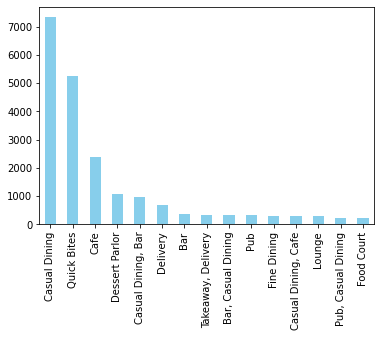

In [26]:
top_resturent_type.plot(kind='bar',color='skyblue')

In [27]:
rate_count=zomato['rate'].value_counts().sort_values(ascending=False)
rate_count

3.9    3246
4.0    2902
4.1    2827
3.8    2483
4.2    2124
4.3    1680
3.7    1646
4.4    1142
3.6     878
4.5     648
3.5     482
3.4     351
2.8     321
2.9     313
3.1     307
4.6     300
3.0     291
3.2     250
3.3     219
2.7     190
4.7     167
2.6     138
4.8      66
2.5      57
4.9      55
2.4      54
2.3      45
2.2      26
2.1      24
2.0      11
1.8       5
Name: rate, dtype: int64

<AxesSubplot:>

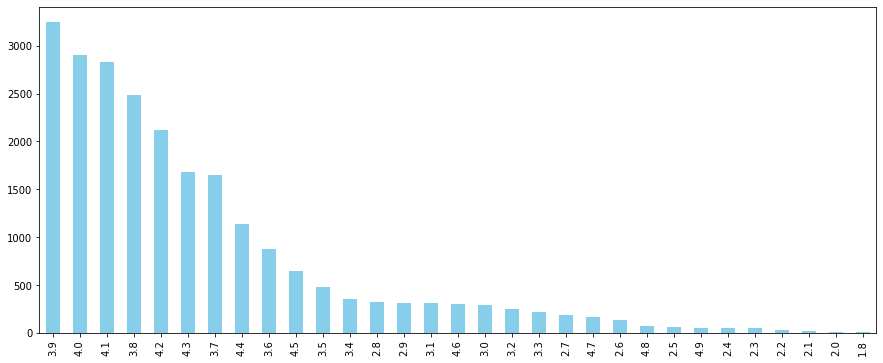

In [28]:
# We can see that More than 50% of Rating are between 3.5 to 4.5
plt.figure(figsize=(15,6))
rate_count.plot(kind='bar',color='skyblue')

#### Resturents Rating With Respect to their Location :

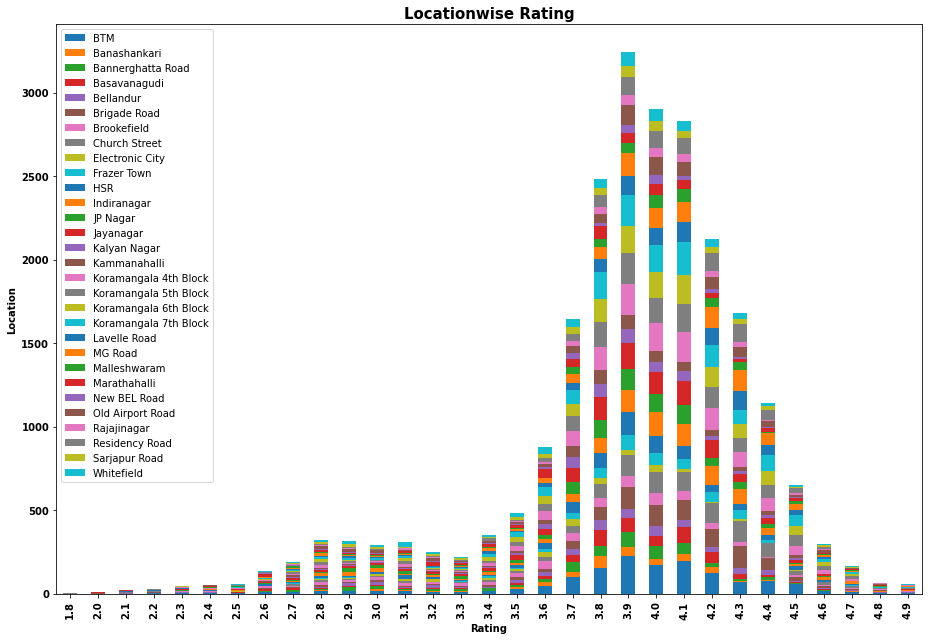

In [46]:
loc_plt=pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend()
plt.tight_layout()

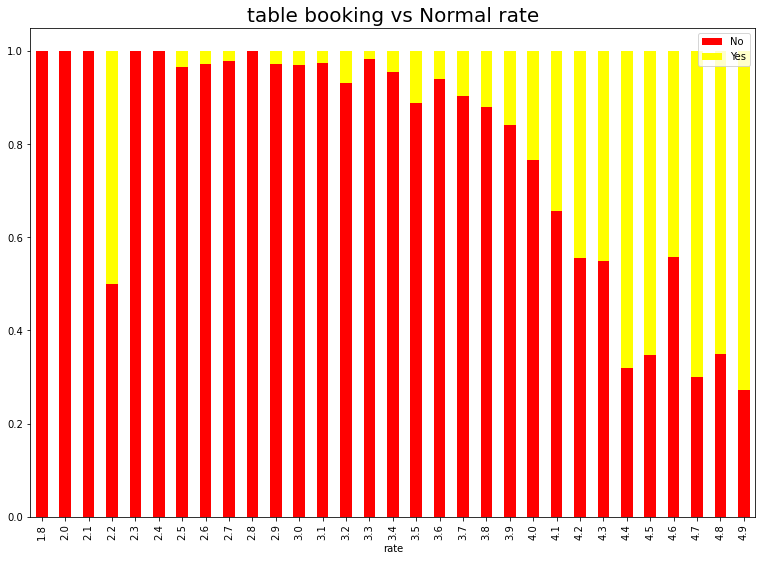

In [30]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(zomato['rate'], zomato['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

####  Which kind of resturents have gain how what Ratings:

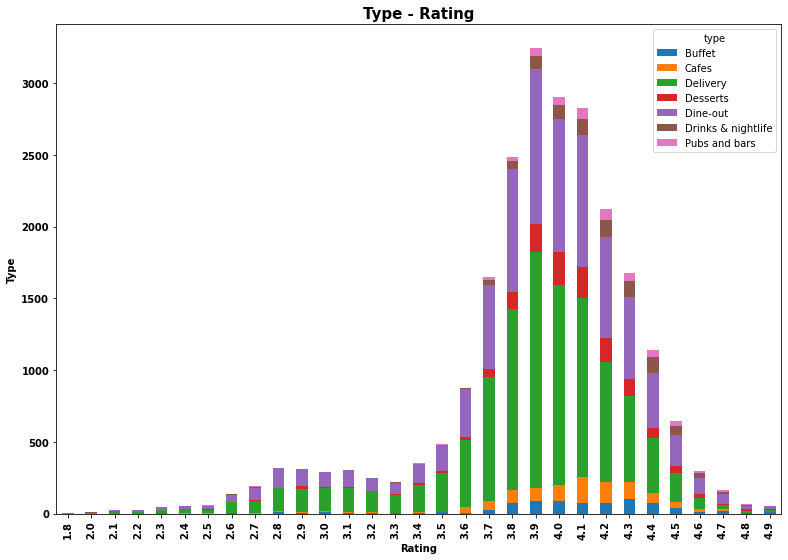

In [31]:
type_plt=pd.crosstab(zomato['rate'],zomato['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

In [32]:
most_no_of_resturents_in_location=zomato['location'].value_counts().sort_values(ascending=False)[:15]

#### Looking in which locations more Resturents are avialable. This type of information will help us to open resturents in those particular area: 

<AxesSubplot:>

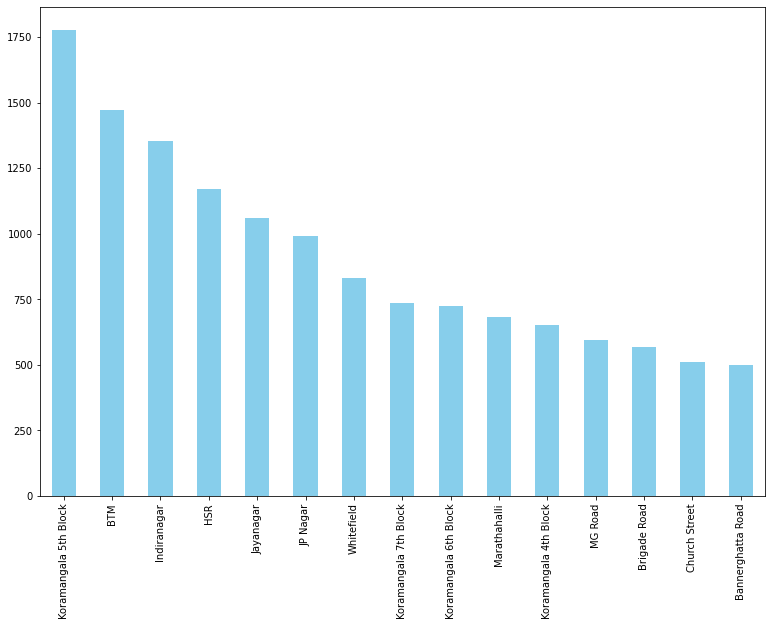

In [33]:
most_no_of_resturents_in_location.plot(kind='bar',color='skyblue')

In [34]:
len(zomato.name.unique())

3157

#### Top Resturents giants which have more branches:

<AxesSubplot:>

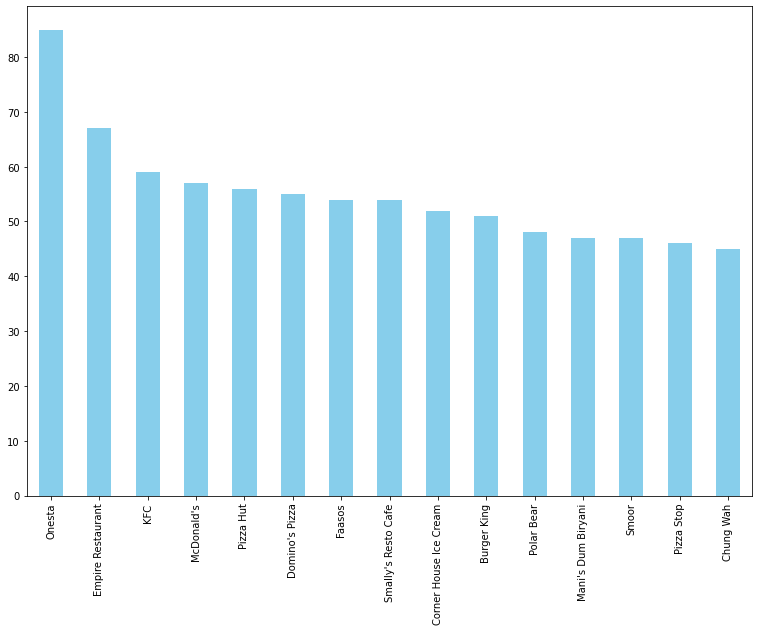

In [35]:
zomato.name.value_counts().sort_values(ascending=False)[:15].plot(kind='bar',color='skyblue')

In [36]:
most_no_of_rest=zomato.groupby('location')['name'].nunique().sort_values(ascending=False)[:15]

<AxesSubplot:xlabel='location'>

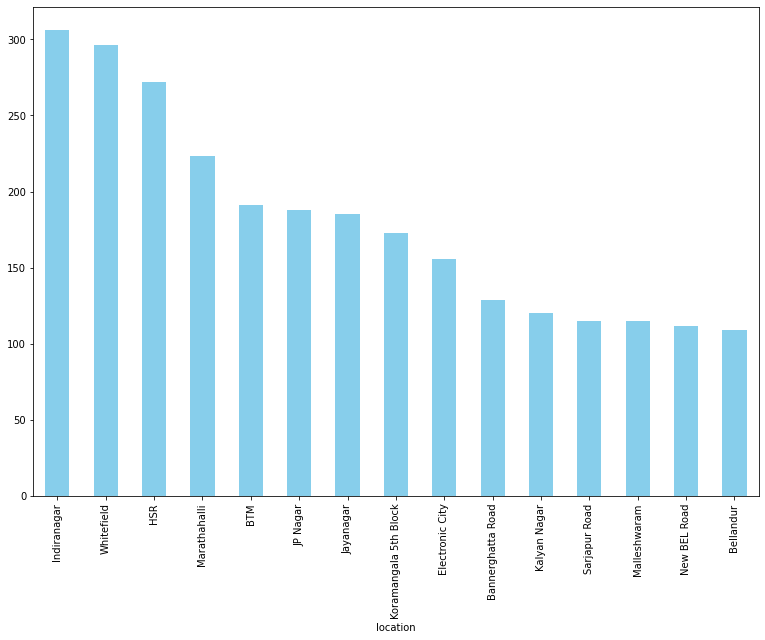

In [37]:
most_no_of_rest.plot(kind='bar',color='skyblue')

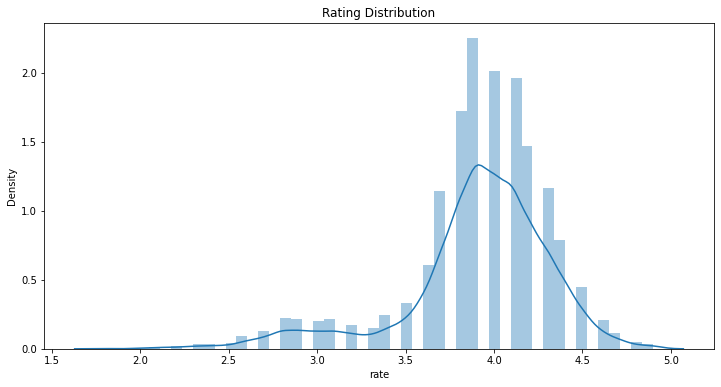

In [25]:
plt.figure(figsize=(12,6))
sns.distplot(zomato['rate'])
plt.title('Rating Distribution')
plt.show()

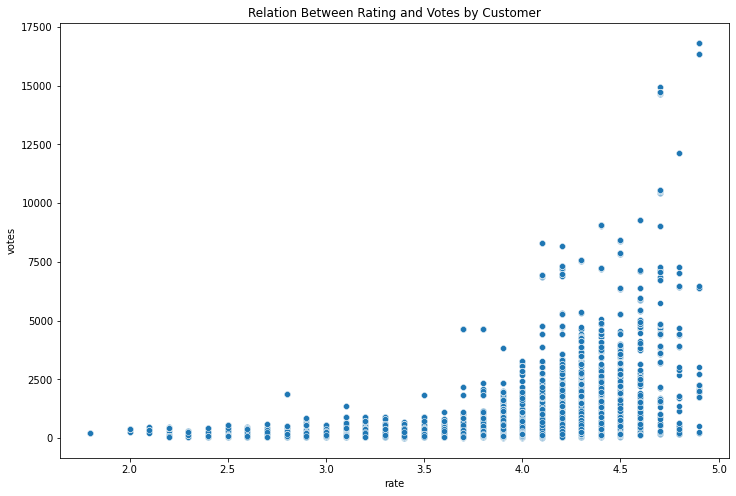

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='rate',y='votes',data=zomato)
plt.title('Relation Between Rating and Votes by Customer')
plt.show()

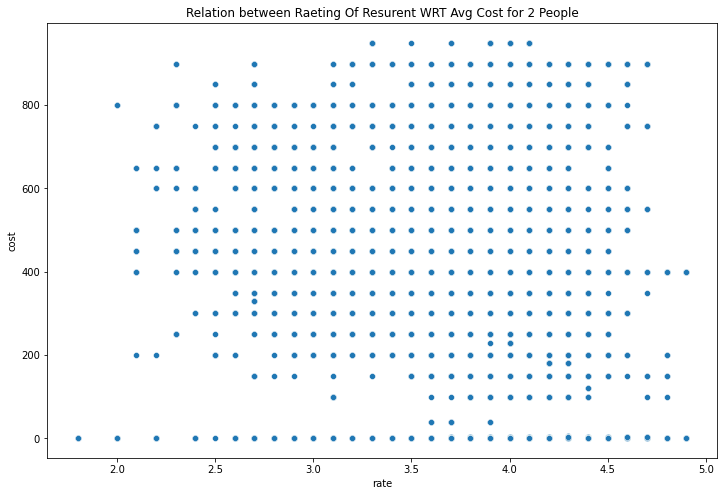

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='rate',y='cost',data=zomato)
plt.title('Relation between Raeting Of Resurent WRT Avg Cost for 2 People')
plt.show()

In [41]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

<AxesSubplot:>

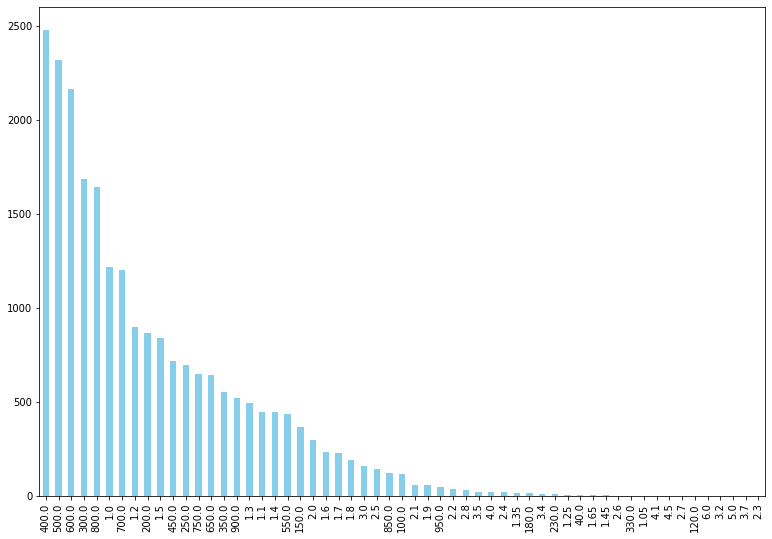

In [42]:
zomato.cost.value_counts().sort_values(ascending=False).plot(kind='bar',color='skyblue')

In [26]:
def dish_liked_counter(zomato):
    
    dish_liked_dict = {}
    dishes = zomato['dish_liked'].dropna()

    for dish in dishes:
        dish_list = [x.strip() for x in dish.split(',')]
        for dish_item in dish_list:
            if dish_item in dish_liked_dict.keys():
                dish_liked_dict[dish_item] +=1
            else:
                dish_liked_dict[dish_item] = 1
    return dish_liked_dict


In [27]:
import operator
def plot_top_dishes(dish_liked_dict):
    sorted_dish = sorted(dish_liked_dict.items(), key=operator.itemgetter(1), reverse=True)
    x = [x[0] for x in sorted_dish[:20]]
    y = [y[1] for y in sorted_dish[:20]]
    
    plt.figure(figsize=(20,10))
    sns.barplot(x, y, alpha=0.8, color = 'skyblue')
    plt.title('Top 20 most liked dishes', fontsize=25)
    plt.ylabel('Number of Restaurants', fontsize=20)
    plt.xlabel('Locations', fontsize=20)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
    plt.show()

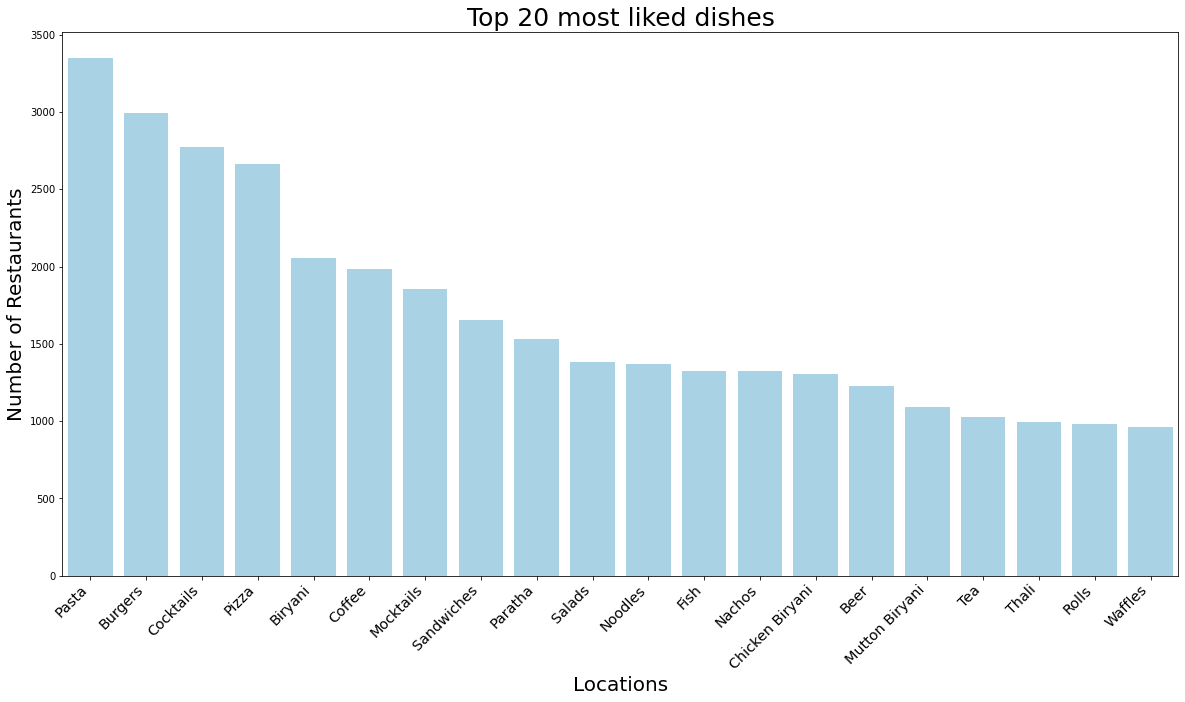

In [28]:
dish_liked_dict = dish_liked_counter(zomato)
plot_top_dishes(dish_liked_dict)

#### With such a large number of youth crowd in Bangalore, it comes with no surprise that fast foods i.e. Pasta, Burgers, Cocktails and Pizza top the chart of most liked dish. Fast Food or a Cafe is a win here.

## Conclusion

We based our analysis keeping restaurant business in mind. We tried to figure out answers to some of the common queries when opening any new restaurant.

* We figured BTM, Koramangala, HSR are good places to start restaurant. WhiteField has most number of unique restaurants and can be cheaper to get started. Koramangala, Indiranagar, BTM are most popular locations among foodies.

* Large number of votes can ensure better rating and 700-1k for 2 people is good to go price.

* Bangalorian love fast food.

* Providing online ordering can boast your chances.